# Learning Lab #1

#### In this lab, you will write several image processing routines, each described below.

These initial code blocks will import some of the routines that you'll need.

In [250]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


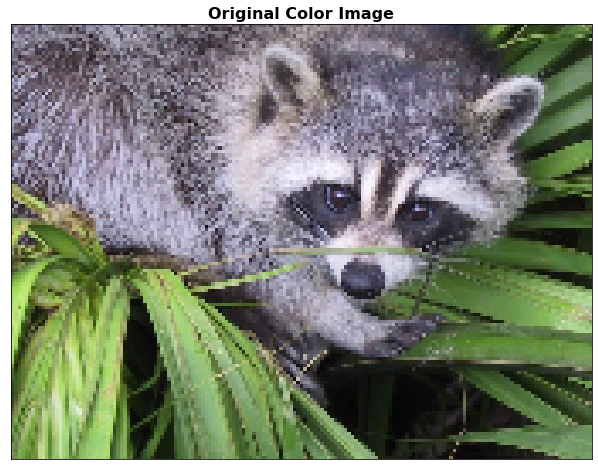

In [251]:
import numpy as np # this is so that you can see which functions come from the numpy library
import matplotlib.pyplot as plt # this is so that you can see which functions come from the pyplot library
plt.rcParams['figure.figsize'] = [15,8]
plt.rcParams['axes.titlesize'] = '16'
plt.rcParams['axes.titleweight'] = 'bold'

import cv2
def just_title(title):
    a = plt.gca()
    a.set_title(title, fontdict={'fontsize': rcParams['axes.titlesize'],
                                 'fontweight' : rcParams['axes.titleweight'],
                                 'verticalalignment': 'baseline',
                                 'horizontalalignment': 'center'})
    a.set_xticks([])
    a.set_yticks([])

from scipy import misc
print()


big_face = misc.face()
s = 128.0/big_face.shape[0]
sm_face = cv2.resize(big_face,(0,0),fx=s,fy=s)

imshow(sm_face);
just_title('Original Color Image')

<br>
<br>

### Problem 1 - Gray Scale

Convert a color image to  gray scale: write a function that takes in  a  color  image  and  returns a  grayscale  image  using  the  following  formula  for  conversion:  

$Gray=  0.299 \cdot Red  +  0.587 \cdot Green  +  0.114 \cdot Blue$

In [252]:
def color2gray(image):
    # Your code goes here
    dcopy = image.copy()
    shape = np.shape(dcopy)
    rows, cols = shape[0], shape[1]
    for row in range(rows):
        for col in range(cols):
            pix = dcopy[row, col]
            gray = 0.299*pix[0] + 0.587*pix[1] + 0.114*pix[2]
            dcopy[row, col] = [gray, gray, gray]
    return dcopy

<br>

Now test your code... 

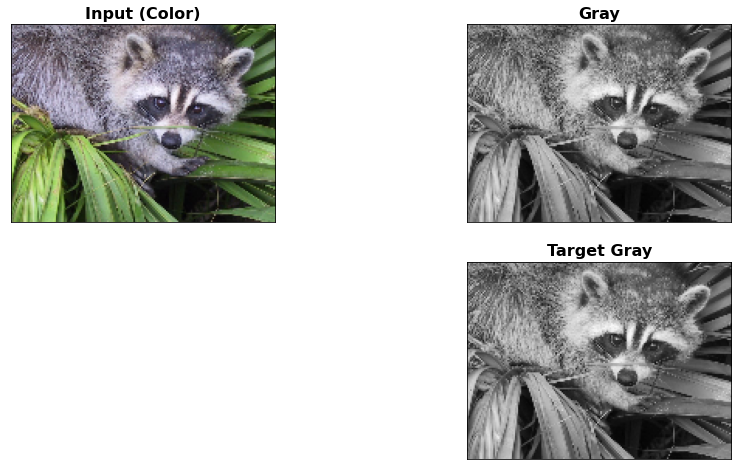

In [253]:
print()
gray_face = color2gray(sm_face)

plt.subplot(221)
plt.imshow(sm_face)
just_title('Input (Color)')

plt.subplot(222)
plt.imshow(gray_face,cmap="gray",vmin=0,vmax=255)
just_title('Gray')

target = cv2.imread('targets/gray.png')
plt.subplot(224)
plt.imshow(target,cmap="gray",vmin=0,vmax=255)
just_title('Target Gray')

plt.show()

<br>
<br>

### Problem 2 - Brightness Adjustment

For this problem, you should read in a  grayscale  image (e.g. from above) and  returns  the  corresponding  result  with  the  brightness  increased or decreased by  a  specified  amount (passed  as  a  parameter).

Be careful if you go below 0 or above 255.  What happens?

In [254]:
def new_brightness(color, offset):
    if color + offset > 255:
        return 255
    elif color + offset < 0:
        return 0
    return color + offset

def adjust_brightness(image, offset):
    dcopy = image.copy()
    shape = np.shape(dcopy)
    rows, cols = shape[0], shape[1]
    for row in range(rows):
        for col in range(cols):
            pix = dcopy[row, col]
            pix[0] = new_brightness(pix[0], offset)
            pix[1] = new_brightness(pix[1], offset)
            pix[2] = new_brightness(pix[2], offset)
    return dcopy

<br>

Now test your code... 

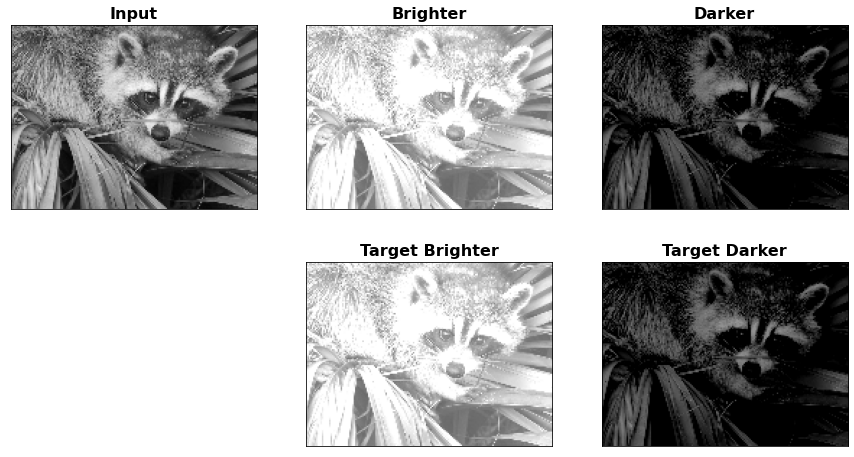

In [255]:
print()
bright_face_p100 = adjust_brightness(gray_face, 100)
bright_face_m100 = adjust_brightness(gray_face, -100)

plt.subplot(231)
plt.imshow(gray_face,cmap="gray",vmin=0,vmax=255)
just_title('Input');

plt.subplot(232)
plt.imshow(bright_face_p100,cmap="gray",vmin=0,vmax=255)
just_title('Brighter');

plt.subplot(233)
plt.imshow(bright_face_m100,cmap="gray",vmin=0,vmax=255)
just_title('Darker');


target_brighter = cv2.imread('targets/brighter.png')
target_darker   = cv2.imread('targets/darker.png')

plt.subplot(235)
plt.imshow(target_brighter,cmap="gray",vmin=0,vmax=255)
just_title('Target Brighter');

plt.subplot(236)
plt.imshow(target_darker,cmap="gray",vmin=0,vmax=255)
just_title('Target Darker');


<br>
<br>

### Problem 3 - Uniform Blurring

For this problem, you should take in  a  grayscale  image  and  return a  corresponding  image  that  has  been  uniformly blurred  (spatially  filtered)  using  3  x  3  uniform  averaging or "box" filter.

In [256]:
def blur_uniform(image, kwidth, kheight):
    # Your code goes here
    dcopy = image.copy()
    shape = np.shape(dcopy)
    rows, cols = shape[0], shape[1]
    
    #this is how many pixels are around the center of the box. e.g. if 3x3 then diff = 1.
    diff_w, diff_h = int(kwidth/2), int(kheight/2)
    
    for row in range(rows):
        for col in range(cols):
            lower_row = max(0,row-diff_w)
            upper_row = min(rows, row+diff_w+1)
            lower_col = max(0,col-diff_h)
            upper_col = min(cols,col+diff_h+1)
            res = image[lower_row:upper_row, lower_col:upper_col]
            dcopy[row, col] = int(np.sum(res)/(3*(upper_row-lower_row)*(upper_col-lower_col)))
    return dcopy

def blur_uniform3x3(image):
    return blur_uniform(image,3,3)

<br>

Now test your code... 

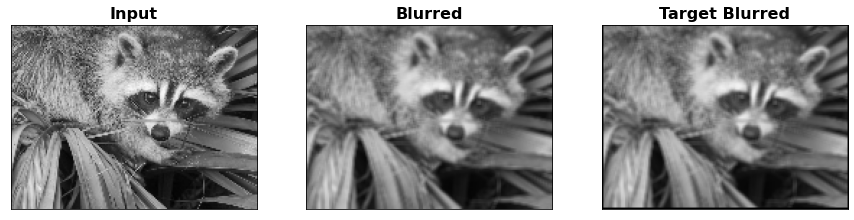

In [257]:
# print()

blur_face = blur_uniform3x3(gray_face)

plt.subplot(131)
plt.imshow(gray_face,cmap="gray",vmin=0,vmax=255)
just_title('Input');

plt.subplot(132)
plt.imshow(blur_face,cmap="gray",vmin=0,vmax=255)
just_title('Blurred')


target_blurred = cv2.imread('targets/ublur.png')
plt.subplot(133)
plt.imshow(target_blurred,cmap="gray",vmin=0,vmax=255)
just_title('Target Blurred')

<br>
<br>

### Problem 4 - Median Filter

This function should take a  grayscale  image and returns a corresponding image  that  has  been  median  filtered  using  a  3  x  3  neighborhood.  Each pixel from the original should be replaced by the median of the 9 values in a 3x3 neighborhood around that pixel.

In [258]:
def median_filter(image,width,height):
    # Your code goes here
    dcopy = image.copy()
    shape = np.shape(dcopy)
    rows, cols = shape[0], shape[1]
    
    #this is how many pixels are around the center of the box. e.g. if 3x3 then diff = 1.
    diff_w, diff_h = int(width/2), int(height/2)
    
    for row in range(rows):
        for col in range(cols):
            lower_row = max(0,row-diff_w)
            upper_row = min(rows, row+diff_w+1)
            lower_col = max(0,col-diff_h)
            upper_col = min(cols,col+diff_h+1)
            box = image[lower_row:upper_row, lower_col:upper_col]
            sorted = sort(box.flatten()[::3])
            dcopy[row, col] = sorted[int(len(sorted)/2)]
    return dcopy

<br>

Now test your code... 

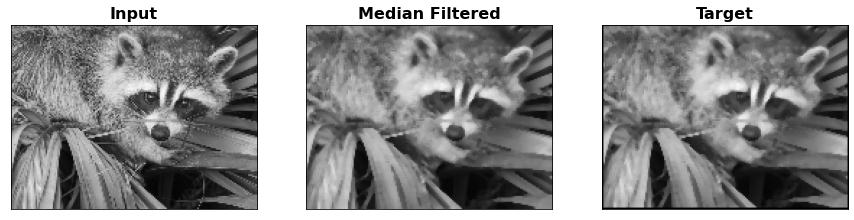

In [259]:
print()

med_face = median_filter(gray_face,3,3)

plt.subplot(131)
plt.imshow(gray_face,cmap="gray",vmin=0,vmax=255)
just_title('Input')

plt.subplot(132)
plt.imshow(med_face,cmap="gray",vmin=0,vmax=255)
just_title('Median Filtered')


median_target = cv2.imread('targets/median.png')
plt.subplot(133)
plt.imshow(median_target,cmap="gray",vmin=0,vmax=255)
just_title('Target')

Note the difference between this and the uniform blur above.  Especially look at the edges of the leaves, they're soft in the uniform blur, but sharp contrast here.  How come?

<br>
<br>

### Problem 5 - Sharpening

This function takes in  a  grayscale  image  and  returns a  corresponding  result  that  has  been  sharpened  using  an  unsharp  masking  kernel  that  has  a  5  in  the  middle  and  -1s  for  the  four-connected  neighbors.

In [260]:
def mul(arr, fraction):
    frac_arr = arr.copy()
    shape = np.shape(frac_arr)
    rows, cols = shape[0], shape[1]
        
    for row in range(rows):
        for col in range(cols):
            #short in time, so I'm just skipping the outer pixel
            if row == 0 or row == rows-1 or col == 0 or col == cols-1:
                frac_arr[row, col] = 0
                continue
            frac_arr[row, col] = int(arr[row, col, 0]*fraction)
    return frac_arr

def sharpen_image(image):
    # Your code goes here
    dcopy = image.copy()
    blurred = image.copy()
    
    shape = np.shape(dcopy)
    rows, cols = shape[0], shape[1]
    diff_w, diff_h = 1, 1

    for row in range(rows):
        for col in range(cols):
            #short in time, so I'm just skipping the outer pixel
            if row == 0 or row == rows-1 or col == 0 or col == cols-1:
                blurred[row, col] = 0
                continue
            lower_row = max(0,row-diff_w)
            upper_row = min(rows, row+diff_w+1)
            lower_col = max(0,col-diff_h)
            upper_col = min(cols,col+diff_h+1)
            flattened = dcopy[lower_row:upper_row, lower_col:upper_col].flatten()[::3]
            mask = [0, -1, 0, -1, 5, -1, 0, -1, 0]
            final = int(sum(flattened * (np.array(mask))))
            blurred[row, col] = final
    
    #This is looking better as I bring the fraction down, is that how it's supposed to be?
    return dcopy + mul(dcopy - blurred, 1/(rows))

<br>

Now test your code... 

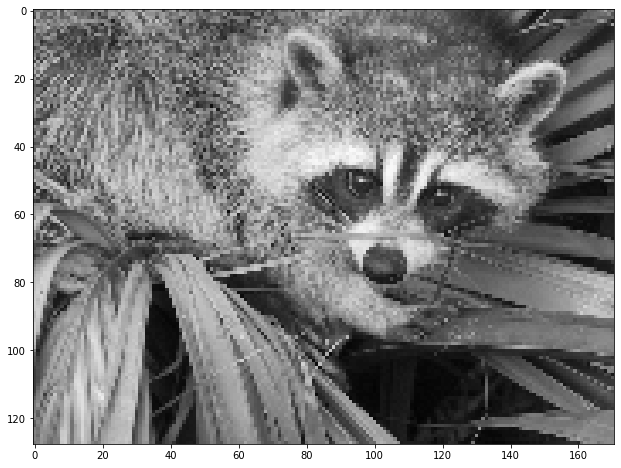

In [261]:
#target = cv2.imread('targets/gray.png')
#cv2.imwrite('targets/median.png',med_face)



sharp_face = sharpen_image(gray_face)
plt.imshow(sharp_face,cmap='gray',vmin=0,vmax=255)
plt.show()

<br>
<br>

### Problem 6 -  Edge Detection

Edge  detection:  takes in  a  grayscale  image  and  returns a  corresponding  result  that  shows  the  gradient  magnitude  of  the  input.    (You  may  afterward  scale  the  result  for  visibility  if  you  wish when  you  demonstrate  using  the  function.)

In [262]:
import math

def edge_detect(image):

    dcopy = image.copy() #use as the official image
    x_arr = image.copy() #stores the x gradient
    y_arr = image.copy() #stores the y gradient
    gradient_arr = image.copy() #stores the gradient magnitude computed from x gradient and y gradient
    
    shape = np.shape(image)
    rows, cols = shape[0], shape[1]
    diff_w, diff_h = 1, 1
    
    for row in range(rows):
        for col in range(cols):
            if row == 0 or row == rows-1 or col == 0 or col == cols-1:
                dcopy[row, col] = 0
                continue
            lower_row = max(0,row-diff_w)
            upper_row = min(rows, row+diff_w+1)
            lower_col = max(0,col-diff_h)
            upper_col = min(cols,col+diff_h+1)
            flattened = dcopy[lower_row:upper_row, lower_col:upper_col].flatten()[::3]
            mask_x = [-1, -1, -1, 0, 0, 0, 1, 1, 1]
            mask_y = [-1, 0, 1, -1, 0, 1, -1, 0, 1]
            x_arr[row, col] = int(sum(flattened * mask_x))
            y_arr[row, col] = int(sum(flattened * mask_y))
            gradient_arr[row, col] = int(math.sqrt((x_arr[row, col, 0]**2) + (y_arr[row, col, 0]**2)))
    
    #not showing what it should. Compare with someone else or solution if professor has one.
    return gradient_arr

<br>

Now test your code... 

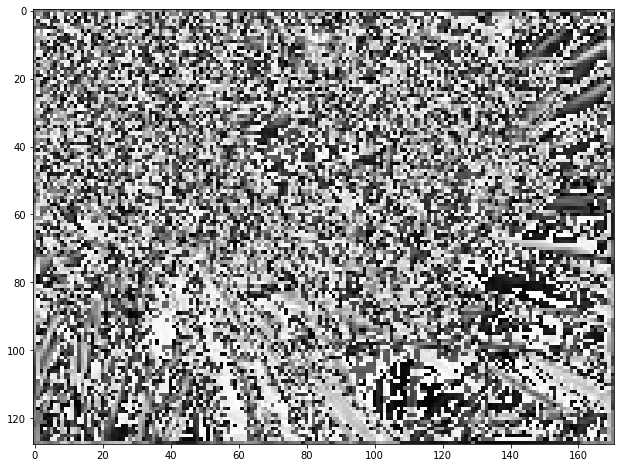

In [263]:
edge = edge_detect(gray_face)
plt.imshow(edge, cmap='gray',vmin=0,vmax=255)
plt.show()